In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

Line 1: X = 6 * np.random.rand(100, 1) - 3
np.random.rand(100, 1) creates 100 random values between 0 and 1, shaped as a column vector.

6 * ... - 3 transforms them to the range [-3, 3].

So, X contains 100 values randomly chosen from the interval [-3, 3].

Line 2: y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)
This line generates the target/output variable y using a quadratic equation:

Quadratic equation :
        y=0.5X^2+1.5X+2+ϵ
        
Where:

    0.5X^2 + 1.5X + 2 is the actual mathematical formula (a parabola).
    
    np.random.randn(100, 1) adds random noise (ε) to make the data more realistic, like real-
    world data that has small random variations (called outliers or noise).

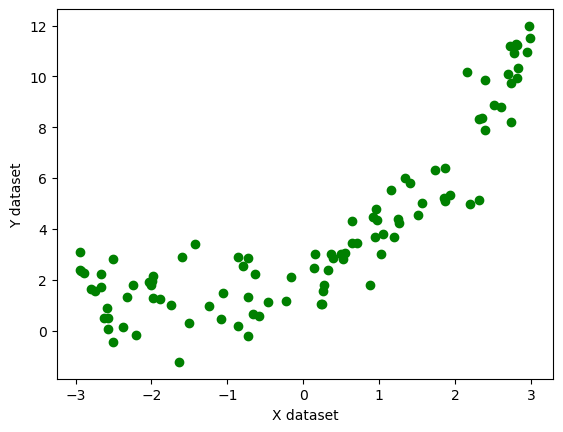

In [2]:
X = 6 * np.random.rand(100, 1)-3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
## quadratic equation used -y= 0.5X^2 + 1.5X + 2 + outliears
plt.scatter(X, y, color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [4]:
X_train.shape, y_train.shape

((80, 1), (80, 1))

In [5]:
from sklearn.linear_model import LinearRegression

regression_1 = LinearRegression()
regression_1.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.7438276971525204


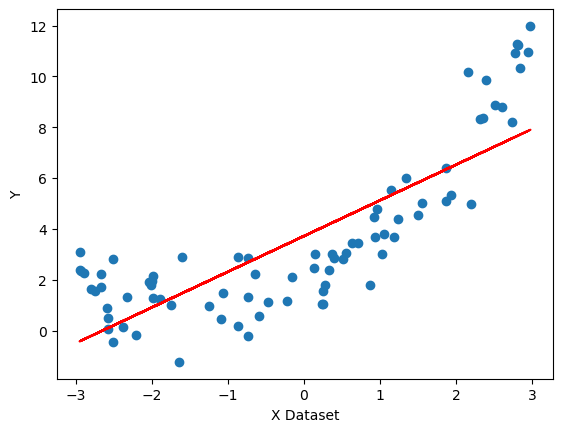

In [7]:
## Lets visualize the model

plt.plot(X_train, regression_1.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")
plt.show()

we are not changing the LinearRegression model —

we are changing the shape of the input data so that the linear model can learn non-linear (quadratic) patterns.

In [8]:
## Let's apply polynomial transformation

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [9]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print("score", score)

score 0.889107629553969


In [10]:
print("coefficient : ", regression.coef_)

coefficient :  [[0.         1.494403   0.53757151]]


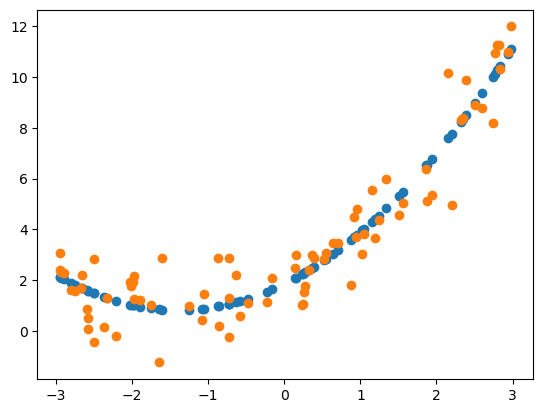

In [11]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [12]:
poly = PolynomialFeatures(degree=3, include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [13]:
X_train_poly

array([[ 1.00000000e+00,  3.66711719e-01,  1.34477485e-01,
         4.93144698e-02],
       [ 1.00000000e+00, -2.88940814e+00,  8.34867939e+00,
        -2.41227422e+01],
       [ 1.00000000e+00,  5.51249971e-01,  3.03876531e-01,
         1.67511929e-01],
       [ 1.00000000e+00,  3.96466671e-01,  1.57185821e-01,
         6.23189391e-02],
       [ 1.00000000e+00,  9.21884487e-01,  8.49871008e-01,
         7.83482898e-01],
       [ 1.00000000e+00,  1.34281540e+00,  1.80315319e+00,
         2.42130186e+00],
       [ 1.00000000e+00,  9.60702414e-01,  9.22949128e-01,
         8.86679455e-01],
       [ 1.00000000e+00,  1.02499108e+00,  1.05060671e+00,
         1.07686250e+00],
       [ 1.00000000e+00, -1.97992909e+00,  3.92011920e+00,
        -7.76155803e+00],
       [ 1.00000000e+00,  1.15077047e+00,  1.32427268e+00,
         1.52393389e+00],
       [ 1.00000000e+00,  2.19855914e+00,  4.83366230e+00,
         1.06270925e+01],
       [ 1.00000000e+00, -2.80114416e+00,  7.84640863e+00,
      

In [14]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.8945932687078559


In [15]:
print("Intercept:", regression.intercept_)
print("Coefficients:", regression.coef_)

Intercept: [1.88010213]
Coefficients: [[0.         1.29900481 0.53524494 0.0322532 ]]


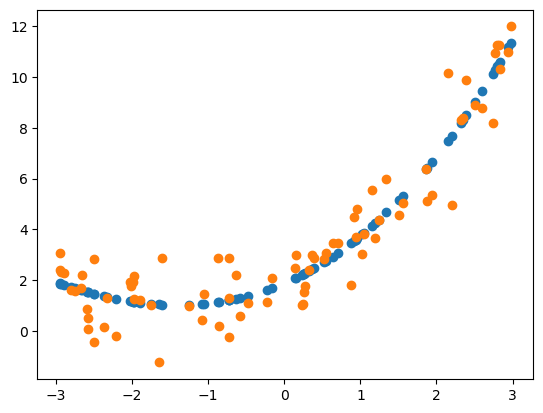

In [16]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [17]:
## Prediction of new Data set

X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

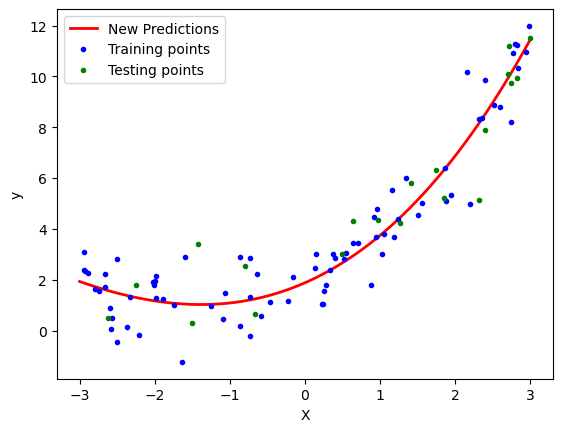

In [18]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="New Predictions")
plt.plot(X_train, y_train, "b.", label = 'Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Concepts

Pipeline is a class from sklearn.pipeline that allows you to chain together multiple steps (like feature scaling, encoding, and a machine learning model) into a single object.

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features = PolynomialFeatures(degree=degree, include_bias = True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train) ## polynomial and fit of regression
    y_pred_new = poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new, 'r', label="Degree" + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth = 3)
    plt.plot(X_test, y_test, "g.", linewidth= 3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    plt.show()

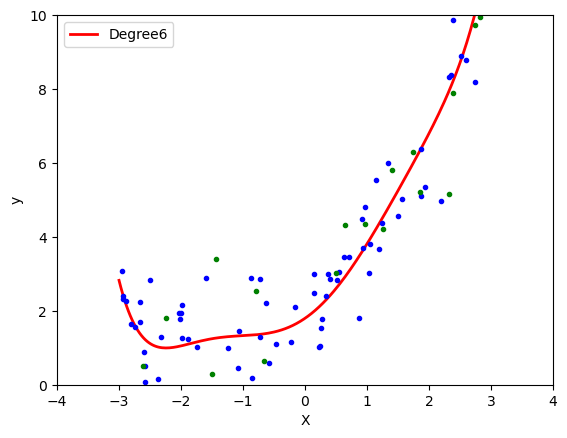

In [21]:
poly_regression(6)